# **Algorithm Design, Implementation, and Performance Analysis**

## **1. Algorithm Design and Implementation**

### **1.1 Quick Sort**

For more detailed information for this algorythm, please visit the referred repository. The link to the repository can be found in the main `README` file.

#### **1.1.1 Algorithm Design**

In [1]:
def partition(A, p, r):
	pivot = A[r]  # Choose the last element as the pivot
	i = p - 1  # Initialize the index for the smaller element
	for j in range(p, r):
		if A[j] <= pivot:  # If the current element is less than or equal to the pivot
			i += 1  # Increment the index for the smaller element
			A[i], A[j] = A[j], A[i]  # Swap the elements
	A[i + 1], A[r] = A[r], A[i + 1]  # Place the pivot in its correct position
	return i + 1  # Return the index of the pivot


def quick_sort(A, p=0, r=None):
	if r is None:  # Evaluate this condition only once
			r = len(A) - 1

	def recursive_quick_sort(A, p, r):
		if p < r:  # Base case: stop when the sublist has one or no elements
			pivot_index = partition(A, p, r)  # Partition the list and get the pivot index
			recursive_quick_sort(A, p, pivot_index - 1)  # Recursively sort the left partition
			recursive_quick_sort(A, pivot_index + 1, r)  # Recursively sort the right partition

	# Call the inner recursive function
	recursive_quick_sort(A, p, r)

### **1.2 Randomized Quick Sort**

Randomized Quick Sort is a variation of the Quick Sort algorithm that improves its performance by reducing the likelihood of encountering the worst-case scenario. It achieves this by randomly selecting a pivot element during partitioning, ensuring a more balanced division of the array on average. This randomness helps to maintain the algorithm's expected time complexity of $O(n \lg n)$ for most input cases.

#### **1.2.1 Algorithm Design**

In [2]:
import random

def random_partition(A, p, q):
	pivot_index = random.randint(p, q)  # Randomly select a pivot index
	A[pivot_index], A[q] = A[q], A[pivot_index]  # Swap the pivot with the last element
	return partition(A, p, q)  # Perform standard partitioning


def random_quicksort(A, p=0, q=None):
	if q is None:  # Evaluate this condition only once
		q = len(A) - 1

	def recursive_random_quicksort(A, p, q):
		if p < q:
			# Randomly select a pivot and partition the list
			pivot_index = random_partition(A, p, q)
			# Recursively sort the left partition
			recursive_random_quicksort(A, p, pivot_index - 1)
			# Recursively sort the right partition
			recursive_random_quicksort(A, pivot_index + 1, q)

	# Call the inner recursive function
	recursive_random_quicksort(A, p, q)

#### **1.2.2 Functionality Demonstration with a Random List**

We will demonstrate the functionality of the `random_quicksort` algorithm by applying it to a randomly generated list. The unsorted list is displayed before sorting, and the sorted result is shown afterward.

In [3]:
import random

A = [random.randint(1, 10) for _ in range(10)]
print(f'List A: {A}')
random_quicksort(A)
print(f'Sorted list: {A}')

List A: [2, 1, 3, 4, 1, 1, 4, 7, 8, 10]
Sorted list: [1, 1, 1, 2, 3, 4, 4, 7, 8, 10]


#### **1.2.3 Validation of Correctness**
We will validate the correctness of `random_quicksort` by comparing its results with the built-in `list.sort()` method.

In [4]:
import random

m = 1000  # The maximum size of the list to test
test = True  # A flag to track whether all tests pass

# Loop through list sizes from 10 to m (inclusive) in steps of 10
for n in range(10, m+1, 10):  
  A = [random.randint(1, n) for _ in range(n)]  # Generate a random list of size n
  B = A.copy()  # Create a copy of the list to compare results later

  random_quicksort(A)  # Sort the list using the random_quicksort algorithm
  B.sort()  # Sort the copy using Python's built-in sort method (reference)

  # Compare the results of random_quicksort with the built-in sort
  if A != B:  
    print('random_quicksort got a different result!!!')  # Print an error message if the results differ
    test = False  # Set the flag to False to indicate a failure
    break  # Exit the loop as the test failed

# If all tests pass, print a success message
if test:  
  print('random_quicksort works perfectly!!!')

random_quicksort works perfectly!!!


### **1.3 Tre (Tail-recursion elimination) Randomized Quick Sort**

Tre Randomized Quick Sort is an optimized version of the Randomized Quick Sort algorithm that reduces the risk of stack overflow by eliminating tail recursion. Instead of making recursive calls for both partitions, it prioritizes the smaller partition for recursion and uses iteration for the larger partition. This approach minimizes the depth of the recursion stack, improving the algorithm's efficiency and stability for large input sizes.

#### **1.3.1 Algorithm Design**

In [5]:
def tre_random_quicksort(A, p=0, q=None):
	if q is None:  # Evaluate this condition only once
		q = len(A) - 1

	while p < q:
		# Randomly select a pivot and partition the list
		pivot_index = random_partition(A, p, q)
		
		# Recursively sort the smaller partition to reduce stack depth
		if pivot_index - p < q - pivot_index:
			tre_random_quicksort(A, p, pivot_index - 1)  # Recursive call for the smaller partition
			p = pivot_index + 1  # Tail-recursion elimination for the larger partition
		else:
			tre_random_quicksort(A, pivot_index + 1, q)  # Recursive call for the smaller partition
			q = pivot_index - 1  # Tail-recursion elimination for the larger partition

#### **1.3.2 Functionality Demonstration with a Random List**

We will demonstrate the functionality of the `tre_random_quicksort` algorithm by applying it to a randomly generated list. The unsorted list is displayed before sorting, and the sorted result is shown afterward.

In [6]:
import random

A = [random.randint(1, 10) for _ in range(10)]
print(f'List A: {A}')
tre_random_quicksort(A)
print(f'Sorted list: {A}')

List A: [1, 10, 1, 9, 4, 3, 4, 2, 6, 6]
Sorted list: [1, 1, 2, 3, 4, 4, 6, 6, 9, 10]


#### **1.3.3 Validation of Correctness**
We will validate the correctness of `tre_random_quicksort` by comparing its results with the built-in `list.sort()` method.

In [7]:
import random

m = 1000  # The maximum size of the list to test
test = True  # A flag to track whether all tests pass

# Loop through list sizes from 10 to m (inclusive) in steps of 10
for n in range(10, m+1, 10):  
  A = [random.randint(1, n) for _ in range(n)]  # Generate a random list of size n
  B = A.copy()  # Create a copy of the list to compare results later

  tre_random_quicksort(A)  # Sort the list using the tre_random_quicksort algorithm
  B.sort()  # Sort the copy using Python's built-in sort method (reference)

  # Compare the results of tre_random_quicksort with the built-in sort
  if A != B:  
    print('tre_random_quicksort got a different result!!!')  # Print an error message if the results differ
    test = False  # Set the flag to False to indicate a failure
    break  # Exit the loop as the test failed

# If all tests pass, print a success message
if test:  
  print('tre_random_quicksort works perfectly!!!')

tre_random_quicksort works perfectly!!!


### **1.4 Partition with Median of Three**

The Partition with Median of Three is an optimization technique used in the Quick Sort algorithm to improve its performance. Instead of selecting a random pivot or the last element as the pivot, this method chooses the median of three randomly selected elements from the array. By using the median as the pivot, the algorithm ensures a more balanced partitioning on average, reducing the likelihood of encountering the worst-case scenario. This approach helps maintain the expected time complexity of $O(n \lg n)$ for most input cases.

#### **1.4.1 Algorithm Design**

In [8]:
import random

def partition_with_median_of_three(A, p, r):
	if r - p + 1 >= 3:  # Ensure the list has at least 3 elements
		indices = random.sample(range(p, r + 1), 3)  # Pick three random indices
		values = [A[i] for i in indices]
		median_value = sorted(values)[1]  # Find the median value
		median_index = indices[values.index(median_value)]  # Get the index of the median value
		A[median_index], A[r] = A[r], A[median_index]  # Swap the median value with the last element

	return partition(A, p, r)  # Perform standard partitioning


def median_quick_sort(A, p=0, r=None):
	if r is None:  # Evaluate this condition only once
		r = len(A) - 1

	def recursive_quick_sort(A, p, r):
		if p < r:  # Base case: stop when the sublist has one or no elements
			pivot_index = partition_with_median_of_three(A, p, r)  # Partition the list and get the pivot index
			recursive_quick_sort(A, p, pivot_index - 1)  # Recursively sort the left partition
			recursive_quick_sort(A, pivot_index + 1, r)  # Recursively sort the right partition

	# Call the inner recursive function
	recursive_quick_sort(A, p, r)

#### **1.4.2 Functionality Demonstration with a Random List**

We will demonstrate the functionality of the `median_quick_sort` algorithm by applying it to a randomly generated list. The unsorted list is displayed before sorting, and the sorted result is shown afterward.

In [9]:
import random

A = [random.randint(1, 10) for _ in range(10)]
print(f'List A: {A}')
median_quick_sort(A)
print(f'Sorted list: {A}')

List A: [8, 9, 8, 7, 5, 9, 6, 7, 2, 8]
Sorted list: [2, 5, 6, 7, 7, 8, 8, 8, 9, 9]


#### **1.4.3 Validation of Correctness**
We will validate the correctness of `median_quick_sort` by comparing its results with the built-in `list.sort()` method.

In [10]:
import random

m = 1000  # The maximum size of the list to test
test = True  # A flag to track whether all tests pass

# Loop through list sizes from 10 to m (inclusive) in steps of 10
for n in range(10, m+1, 10):  
  A = [random.randint(1, n) for _ in range(n)]  # Generate a random list of size n
  B = A.copy()  # Create a copy of the list to compare results later

  median_quick_sort(A)  # Sort the list using the median_quick_sort algorithm
  B.sort()  # Sort the copy using Python's built-in sort method (reference)

  # Compare the results of median_quick_sort with the built-in sort
  if A != B:  
    print('median_quick_sort got a different result!!!')  # Print an error message if the results differ
    test = False  # Set the flag to False to indicate a failure
    break  # Exit the loop as the test failed

# If all tests pass, print a success message
if test:  
  print('median_quick_sort works perfectly!!!')

median_quick_sort works perfectly!!!


## **2. Experiment Block: Performance Comparison**

### **2.1 Importing Libraries and Setting Up Paths**

In [11]:
import random
import time
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.abspath("../img"))

### **2.2 Utility Functions for Input Generation**

In [12]:
def random_list(n):
	# Generates a list of 'n' random integers between 1 and 'n'
	return [random.randint(1, n) for _ in range(n)]

def sorted_list(n):
	# Generates a sorted list of integers from 1 to 'n' (inclusive)
	return list(range(1, n+1))

def reverse_sorted_list(n):
	# Generates a reverse-sorted list of integers from 'n' to 1
	return list(range(n, 0, -1))

### **2.3 Utility Functions for Performance Measurement and Visualization**

In [13]:
# Function that computes the execution time
def execution_time(fun, *args):
	# Record the start time before the function call
	start = time.time()
	
	# Call the function with the provided arguments
	fun(*args)
	
	# Record the end time after the function call
	end = time.time()
	
	# Return the difference between end and start times (execution duration)
	return end - start



# Function that compares execution time
def comparison_machine(sizes, reps, algorithm, scenario):
	# Initialize a list to store total execution times for each algorithm
	total_time = [[] for _ in algorithm]
	
	# Loop through each size in the list of sizes
	for n in sizes:
		# Initialize a list to store the cumulative execution time for each algorithm
		cumulative_time = [0 for _ in algorithm]
		
		# Repeat the experiment 'reps' times for each size
		for _ in range(reps):
			# Generate a sample list of size 'n' using the provided scenario function
			list_sample = scenario(n)
			
			# Loop through each algorithm and measure its execution time
			for i, algo in enumerate(algorithm):
				# Create a copy of the sample list to avoid modifying the original
				list_copy = list_sample.copy()
				
				# Measure the execution time of the algorithm and add it to the cumulative time
				cumulative_time[i] += execution_time(algo, list_copy)
		
		# Calculate the average execution time for each algorithm and append it to total_times
		for i, t in enumerate(cumulative_time):
			total_time[i].append(t / reps)
	
	# Return the list of average execution times for each algorithm
	return total_time



# Function that plots the results
def comparison_graph(sizes, t, algorithm, scenario):
	# Create the plot
	for i, algo in enumerate(algorithm):
		# Plot the execution times for each algorithm
		plt.plot(sizes, t[i], label=algo.__name__)
	
	# Plot features
	plt.title(f'Comparison ({scenario.__name__})') # Title
	plt.xlabel("List size (n)") # x-axis label
	plt.ylabel("Average time (s)") # y-axis label
	plt.legend(loc='upper left') # show legend

	# Relative path to the 'img' folder from the notebook location
	img_path = os.path.join("..", "img")
	
	# Ensure the 'img' folder exists; create it if it doesn't
	os.makedirs(img_path, exist_ok=True)

	# Save the graph to the 'img' folder with a filename based on the scenario name
	filename = os.path.join(img_path, f"{scenario.__name__}_comparison_2.png")
	plt.savefig(filename, bbox_inches="tight")  # Save the plot with tight bounding box
	print(f"Graph saved to: {filename}")  # Print the location of the saved graph
	
	# Display the plot
	plt.show()



# Function that calls all the machinery
def machine_call(sizes, reps, algorithm, scenario):
	# Call the comparison_machine function to compute execution times
	t = comparison_machine(sizes, reps, algorithm, scenario)
	
	# Call the comparison_graph function to plot the results
	comparison_graph(sizes, t, algorithm, scenario)

### **2.4 Comparison with `random_list`**

This subsection evaluates the performance of `quick_sort`, `random_quicksort`, `tre_random_quicksort` and `median_quick_sort` algorithms using randomly generated input lists of varying sizes. The execution times are measured and averaged over multiple repetitions, and the results are visualized in a comparison graph. This analysis helps to understand the efficiency and scalability of the algorithms under random input conditions.

Graph saved to: ..\img\random_list_comparison_2.png


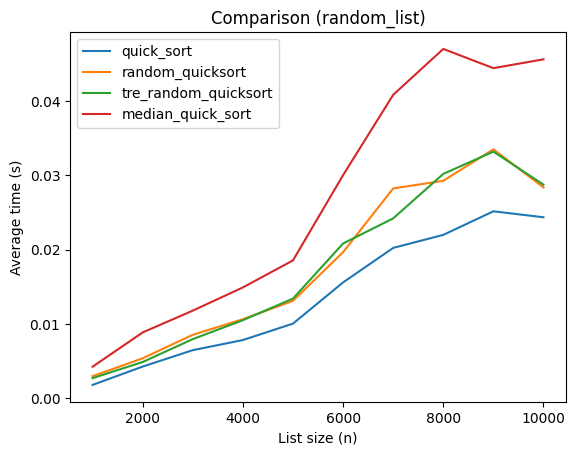

In [14]:
samples = 10  # Number of sample points (input sizes) to test
step_size = 1000  # Step size for generating input sizes
sizes = [i * step_size for i in range(1, samples + 1)]  # List of input sizes to test

reps = 10  # Number of repetitions for each input size to calculate average execution time

algorithm = [quick_sort, random_quicksort, tre_random_quicksort, median_quick_sort]  # List of algorithms to compare
scenario = random_list # Scenario (random list generator) to test

# Call the machine_call function to compute execution times and generate a comparison graph
machine_call(sizes, reps, algorithm, scenario)

The plot above demonstrates that all algorithms perform well on average. However, the differences arise from the additional conditions and optimizations in the improved versions. While quick_sort is the fastest due to its simplicity, median_quick_sort is the slowest because of the overhead introduced by calculating the median of three elements. These results highlight the trade-off between simplicity and optimization in algorithm design.

### **2.5 Comparison with `sorted_list`**

This subsection evaluates the performance of `quick_sort`, `random_quicksort`, `tre_random_quicksort` and `median_quick_sort` algorithms using pre-sorted input lists of varying sizes. The execution times are measured and averaged over multiple repetitions, and the results are visualized in a comparison graph. This analysis highlights the behavior of the algorithms when applied to already sorted data, providing insights into their best-case performance.

Graph saved to: ..\img\sorted_list_comparison_2.png


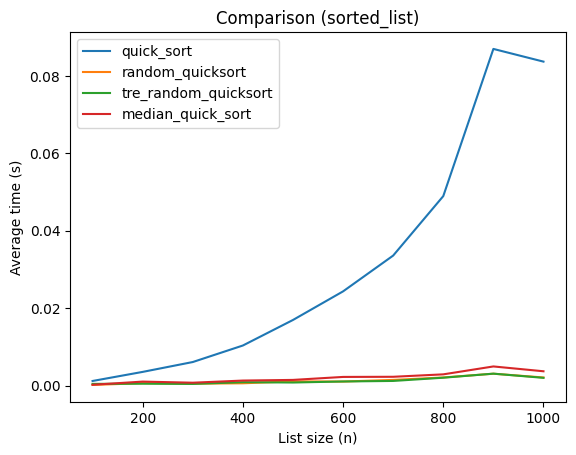

In [15]:
samples = 10  # Number of sample points (input sizes) to test
step_size = 100  # Step size for generating input sizes
sizes = [i * step_size for i in range(1, samples + 1)]  # List of input sizes to test

reps = 10  # Number of repetitions for each input size to calculate average execution time

algorithm = [quick_sort, random_quicksort, tre_random_quicksort, median_quick_sort]  # List of algorithms to compare
scenario = sorted_list # Scenario (sorted list generator) to test

# Call the machine_call function to compute execution times and generate a comparison graph
machine_call(sizes, reps, algorithm, scenario)

As expected, `quick_sort` performs poorly due to its worst-case behavior on sorted lists, while the randomized and optimized versions (`random_quicksort`, `tre_random_quicksort`, and `median_quick_sort`) demonstrate significantly better performance. This highlights the importance of pivot selection strategies in mitigating worst-case scenarios and ensuring consistent efficiency across different input conditions.

### **2.6 Comparison with `reverse_sorted_list`**

This subsection evaluates the performance of `quick_sort`, `random_quicksort`, `tre_random_quicksort` and `median_quick_sort` algorithms using reverse-sorted input lists of varying sizes. The execution times are measured and averaged over multiple repetitions, and the results are visualized in a comparison graph. This analysis provides insights into the behavior of the algorithms in their worst-case scenarios, highlighting their efficiency and scalability under such conditions.

Graph saved to: ..\img\reverse_sorted_list_comparison_2.png


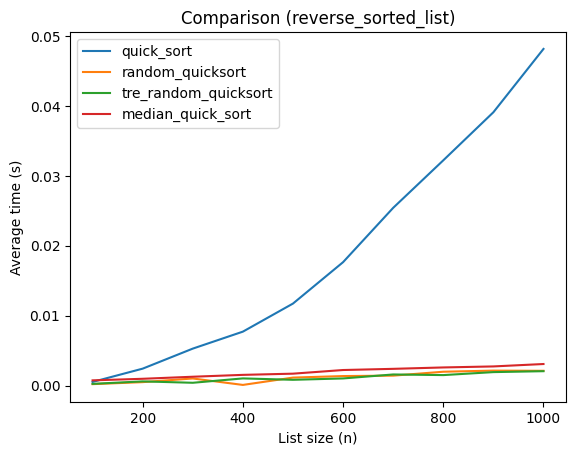

In [ ]:
samples = 10  # Number of sample points (input sizes) to test
step_size = 100  # Step size for generating input sizes
sizes = [i * step_size for i in range(1, samples + 1)]  # List of input sizes to test

reps = 10  # Number of repetitions for each input size to calculate average execution time

algorithm = [quick_sort, random_quicksort, tre_random_quicksort, median_quick_sort]  # List of algorithms to compare
scenario = reverse_sorted_list # Scenario (reverse sorted list generator) to test

# Call the machine_call function to compute execution times and generate a comparison graph
machine_call(sizes, reps, algorithm, scenario)

While `quick_sort` performs poorly due to its deterministic pivot selection, the randomized and optimized versions (`random_quicksort`, `tre_random_quicksort`, and `median_quick_sort`) demonstrate significantly better efficiency. This underscores the importance of pivot selection strategies in mitigating worst-case scenarios and ensuring scalability.

## **Conclusion**

This notebook provides a comprehensive analysis of various Quick Sort algorithms, including `quick_sort`, `random_quicksort`, `tre_random_quicksort`, and `median_quick_sort`. Through functionality demonstrations, correctness validations, and performance comparisons under different input scenarios (`random_list`, `sorted_list`, and `reverse_sorted_list`), we have gained valuable insights into their behavior and efficiency.

### **Key Observations:**
1. **Pivot Selection Matters:** 
	- The choice of pivot significantly impacts the performance of Quick Sort. While `quick_sort` is simple and fast for random inputs, it performs poorly on sorted or reverse-sorted lists due to its deterministic pivot selection.
	- Randomized pivot selection (`random_quicksort`) and optimizations like `median_quick_sort` mitigate worst-case scenarios, ensuring more consistent performance.

2. **Tail-Recursion Elimination:**
	- `tre_random_quicksort` demonstrates the benefits of tail-recursion elimination, reducing stack depth and improving stability for large input sizes.

3. **Scalability:**
	- All algorithms scale well with increasing input sizes, but their relative performance depends on the input distribution. Randomized and optimized versions consistently outperform the basic `quick_sort` in worst-case scenarios.

### Final Remarks:
The analysis highlights the importance of algorithmic optimizations in achieving robust and efficient sorting. While the basic `quick_sort` is suitable for random inputs, the randomized and optimized versions are better suited for diverse and challenging input distributions. These findings underscore the trade-offs between simplicity, performance, and robustness in algorithm design.